# Outlier detection for the house prices dataset

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.covariance import EllipticEnvelope

In [170]:
df = pd.read_csv('../datasets/house_prices/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [171]:
df.rename(columns={ 
    'GrLivArea' : 'gr_live_area',
    'YearBuilt' : 'year_built',
    'SalePrice' : 'sale_price' 
}, inplace=True)

columns = df.columns
columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'year_built', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'gr_live_area', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 

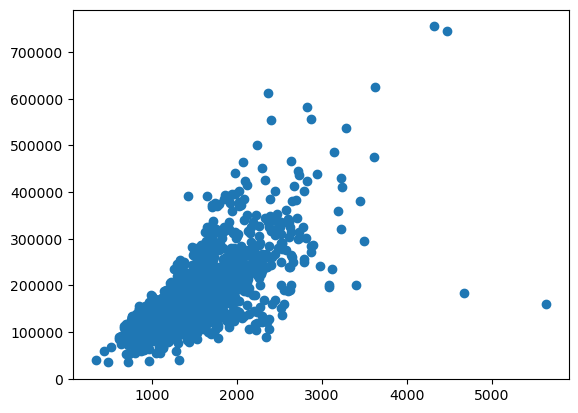

In [172]:
plt.scatter(df.gr_live_area, df.sale_price)
plt.show()

In [173]:
df[['gr_live_area', 'sale_price']].describe()

,gr_live_area,sale_price
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


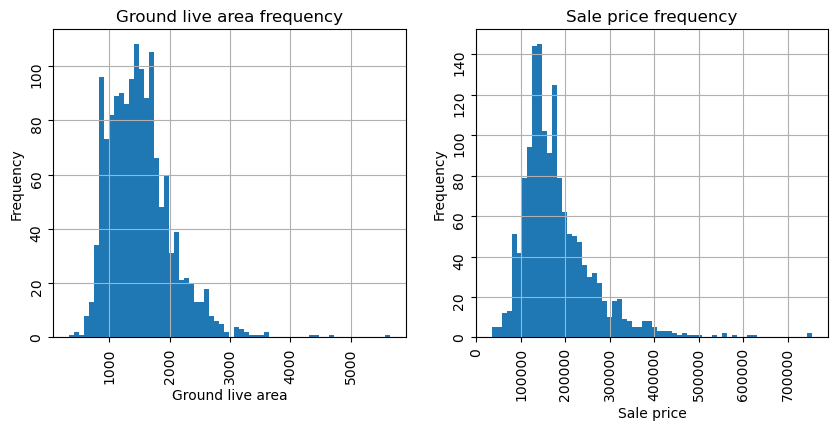

In [174]:
fig, axs = plt.subplots(1,2, figsize=(10, 4))

ax0 = axs[0]
ax0.set_title('Ground live area frequency')
ax0.set_xlabel('Ground live area')
ax0.set_ylabel('Frequency')
ax0.tick_params(labelrotation=90)
df.gr_live_area.hist(ax=ax0, bins=64)

ax1 =axs[1]
ax1.set_title('Sale price frequency')
ax1.set_xlabel('Sale price')
ax1.set_ylabel('Frequency')
ax1.tick_params(labelrotation=90)
df.sale_price.hist(ax=ax1, bins=64)

plt.show()

In [175]:
model = EllipticEnvelope(contamination = 0.01)
temp_df = df[['gr_live_area', 'sale_price']]

price_by_area_df = temp_df.copy()
model.fit(temp_df)
price_by_area_df['deviation'] = model.decision_function(temp_df)
price_by_area_df['anomaly'] = model.predict(temp_df)
        
price_by_area_df.head()

,gr_live_area,sale_price,deviation,anomaly
0,1710,208500,47.690720,1
1,1262,181500,47.499973,1
2,1786,223500,46.956305,1
3,1717,140000,45.619575,1
4,2198,250000,44.315003,1


In [176]:
price_by_area_df['anomaly'].value_counts()

 1    1445
-1      15
Name: anomaly, dtype: int64

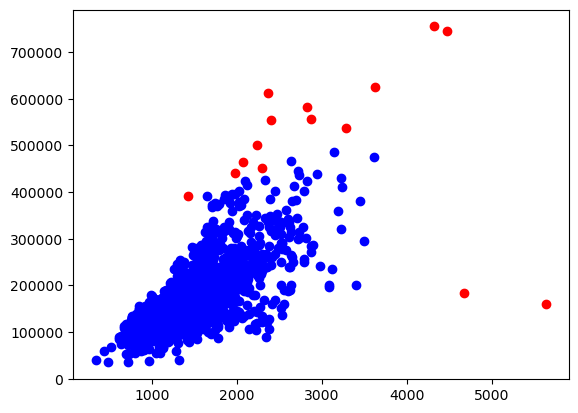

In [177]:
normal_df = price_by_area_df.loc[price_by_area_df['anomaly'] == 1, ['gr_live_area', 'sale_price']]
anomaly_df = price_by_area_df.loc[price_by_area_df['anomaly'] == -1, ['gr_live_area', 'sale_price']]

plt.scatter(normal_df.gr_live_area, normal_df.sale_price, color=['blue'])
plt.scatter(anomaly_df.gr_live_area, anomaly_df.sale_price, color=['red'])
plt.show()

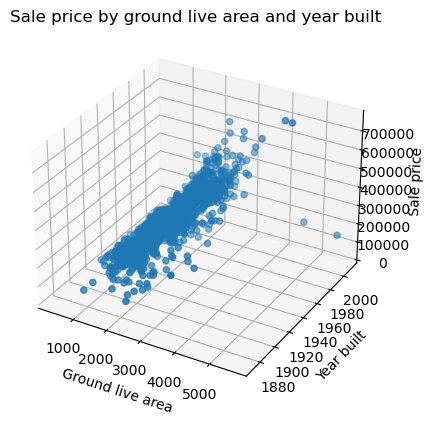

In [178]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title('Sale price by ground live area and year built')

ax.scatter(df.gr_live_area, df.year_built, df.sale_price, marker='o')

ax.set_xlabel('Ground live area')
ax.set_ylabel('Year built')
ax.set_zlabel('Sale price')

plt.show()

In [179]:
model = EllipticEnvelope(contamination = 0.01)
temp_df = df[['gr_live_area', 'year_built', 'sale_price']]

price_by_area_and_year_df = temp_df.copy()
model.fit(temp_df)
price_by_area_and_year_df['deviation'] = model.decision_function(temp_df)
price_by_area_and_year_df['anomaly'] = model.predict(temp_df)
        
price_by_area_and_year_df.head()

,gr_live_area,year_built,sale_price,deviation,anomaly
0,1710,2003,208500,76.217404,1
1,1262,1976,181500,76.389898,1
2,1786,2001,223500,75.936813,1
3,1717,1915,140000,70.333899,1
4,2198,2000,250000,72.884770,1


In [180]:
price_by_area_and_year_df['anomaly'].value_counts()

 1    1445
-1      15
Name: anomaly, dtype: int64

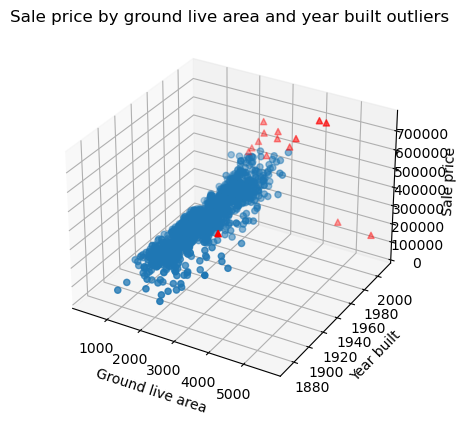

In [181]:
normal_df = price_by_area_and_year_df.loc[ \
    price_by_area_and_year_df['anomaly'] == 1, ['gr_live_area', 'year_built', 'sale_price']]
anomaly_df = price_by_area_and_year_df.loc[ \
    price_by_area_and_year_df['anomaly'] == -1, ['gr_live_area', 'year_built', 'sale_price']]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title('Sale price by ground live area and year built outliers')

ax.scatter(normal_df.gr_live_area, normal_df.year_built, normal_df.sale_price, marker='o')
ax.scatter(anomaly_df.gr_live_area, anomaly_df.year_built, anomaly_df.sale_price, marker='^', color='red')

ax.set_xlabel('Ground live area')
ax.set_ylabel('Year built')
ax.set_zlabel('Sale price')

plt.show()